# Decision Tree

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier#
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [2]:
dt= pd.read_csv('Company_Data.csv')
dt

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
dt.shape

(400, 11)

In [5]:
dt.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [6]:
dt=pd.get_dummies(dt,columns=['Urban','US'], drop_first=True)

In [7]:
dt

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_Yes    400 non-null    uint8  
 10  US_Yes       400 non-null    uint8  
dtypes: float64(1), int64(7), object(1), uint8(2)
memory usage: 29.0+ KB


In [9]:
dt.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000


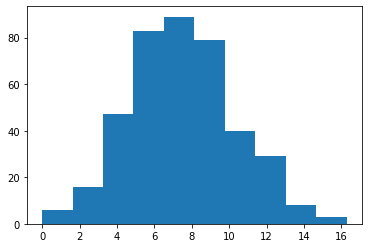

In [10]:
plt.hist('Sales',data= dt)
plt.show()

In [11]:
dt1 = dt.copy()
dt1['Sales_cat'] = pd.cut(x = dt1['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
dt1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,1,1,High
1,11.22,111,48,16,260,83,Good,65,10,1,1,High
2,10.06,113,35,10,269,80,Medium,59,12,1,1,High
3,7.40,117,100,4,466,97,Medium,55,14,1,1,Medium
4,4.15,141,64,3,340,128,Bad,38,13,1,0,Low


In [12]:
dt1.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

In [13]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban_Yes    400 non-null    uint8   
 10  US_Yes       400 non-null    uint8   
 11  Sales_cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(1), uint8(2)
memory usage: 29.6+ KB


In [14]:
categorical_features = dt1.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Sales_cat'], dtype='object')

In [15]:
numerical_features = dt1.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

C:\Users\AANANTHA PRIYA S M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


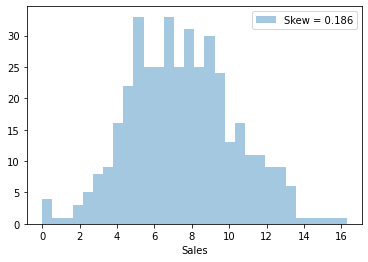

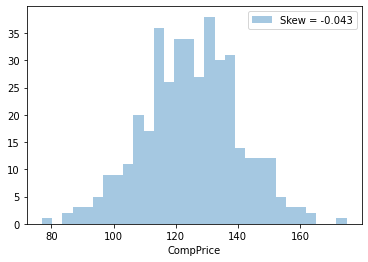

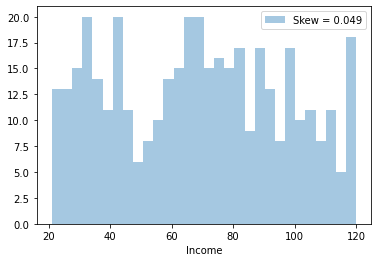

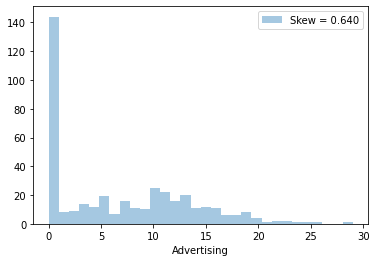

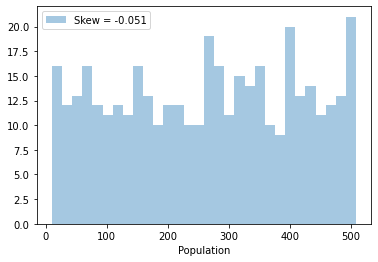

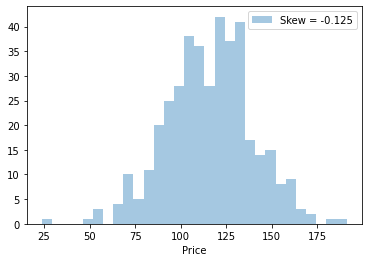

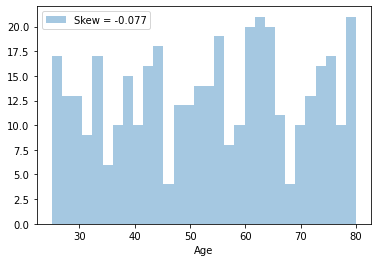

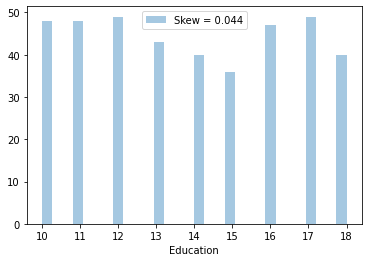

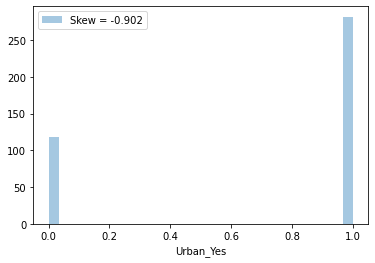

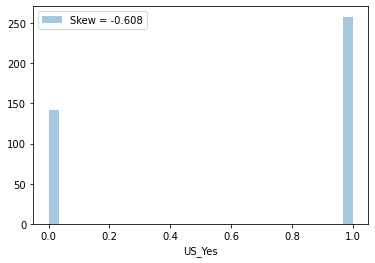

In [16]:
#EDA
numerical_features = [feature for feature in dt.columns if dt[feature].dtypes != 'O']
for feat in numerical_features:
    skew = dt[feat].skew()
    sns.distplot(dt[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [17]:
numerical_features

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

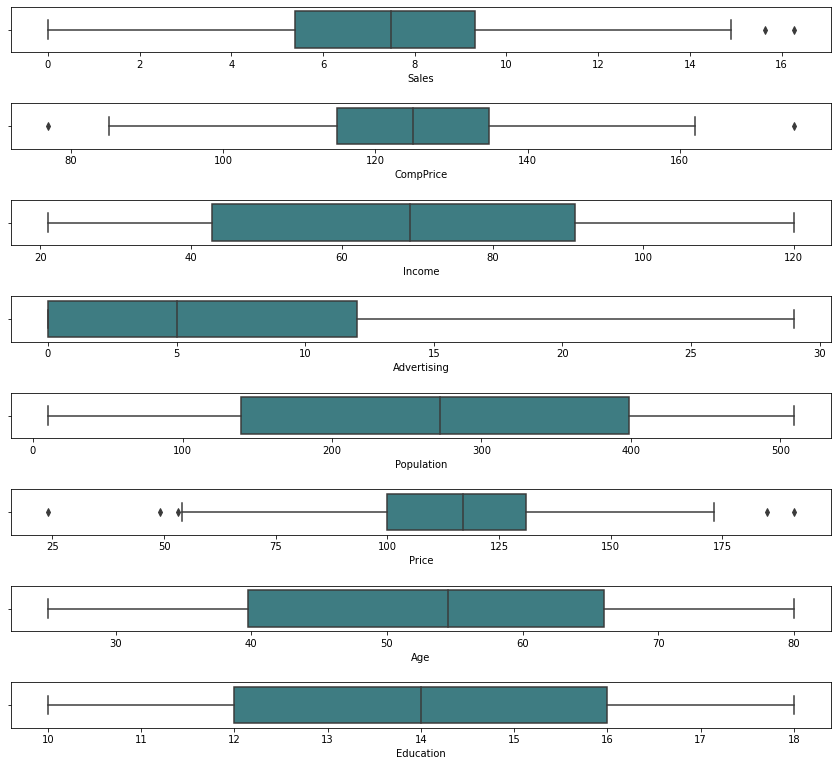

In [18]:
outliers = dt.copy() 
fig, axes = plt.subplots(8,1,figsize=(12,11),sharex=False,sharey=False)
sns.boxplot(x='Sales', data= outliers,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data= outliers,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data= outliers,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data= outliers,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data= outliers,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data= outliers,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data= outliers,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data= outliers,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

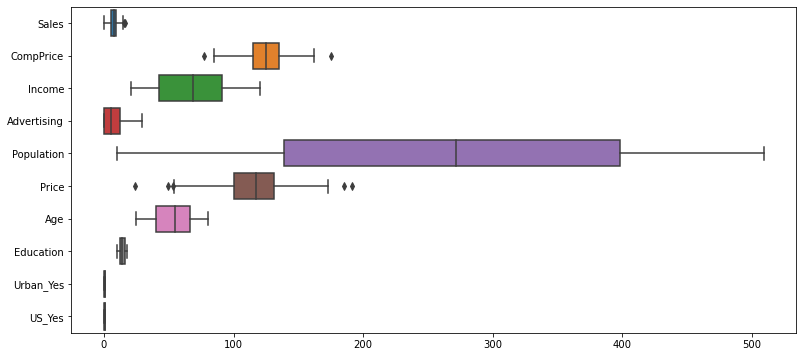

In [19]:
plt.figure(figsize=(13,6))
sns.boxplot(data=dt[numerical_features], orient="h")
plt.show()


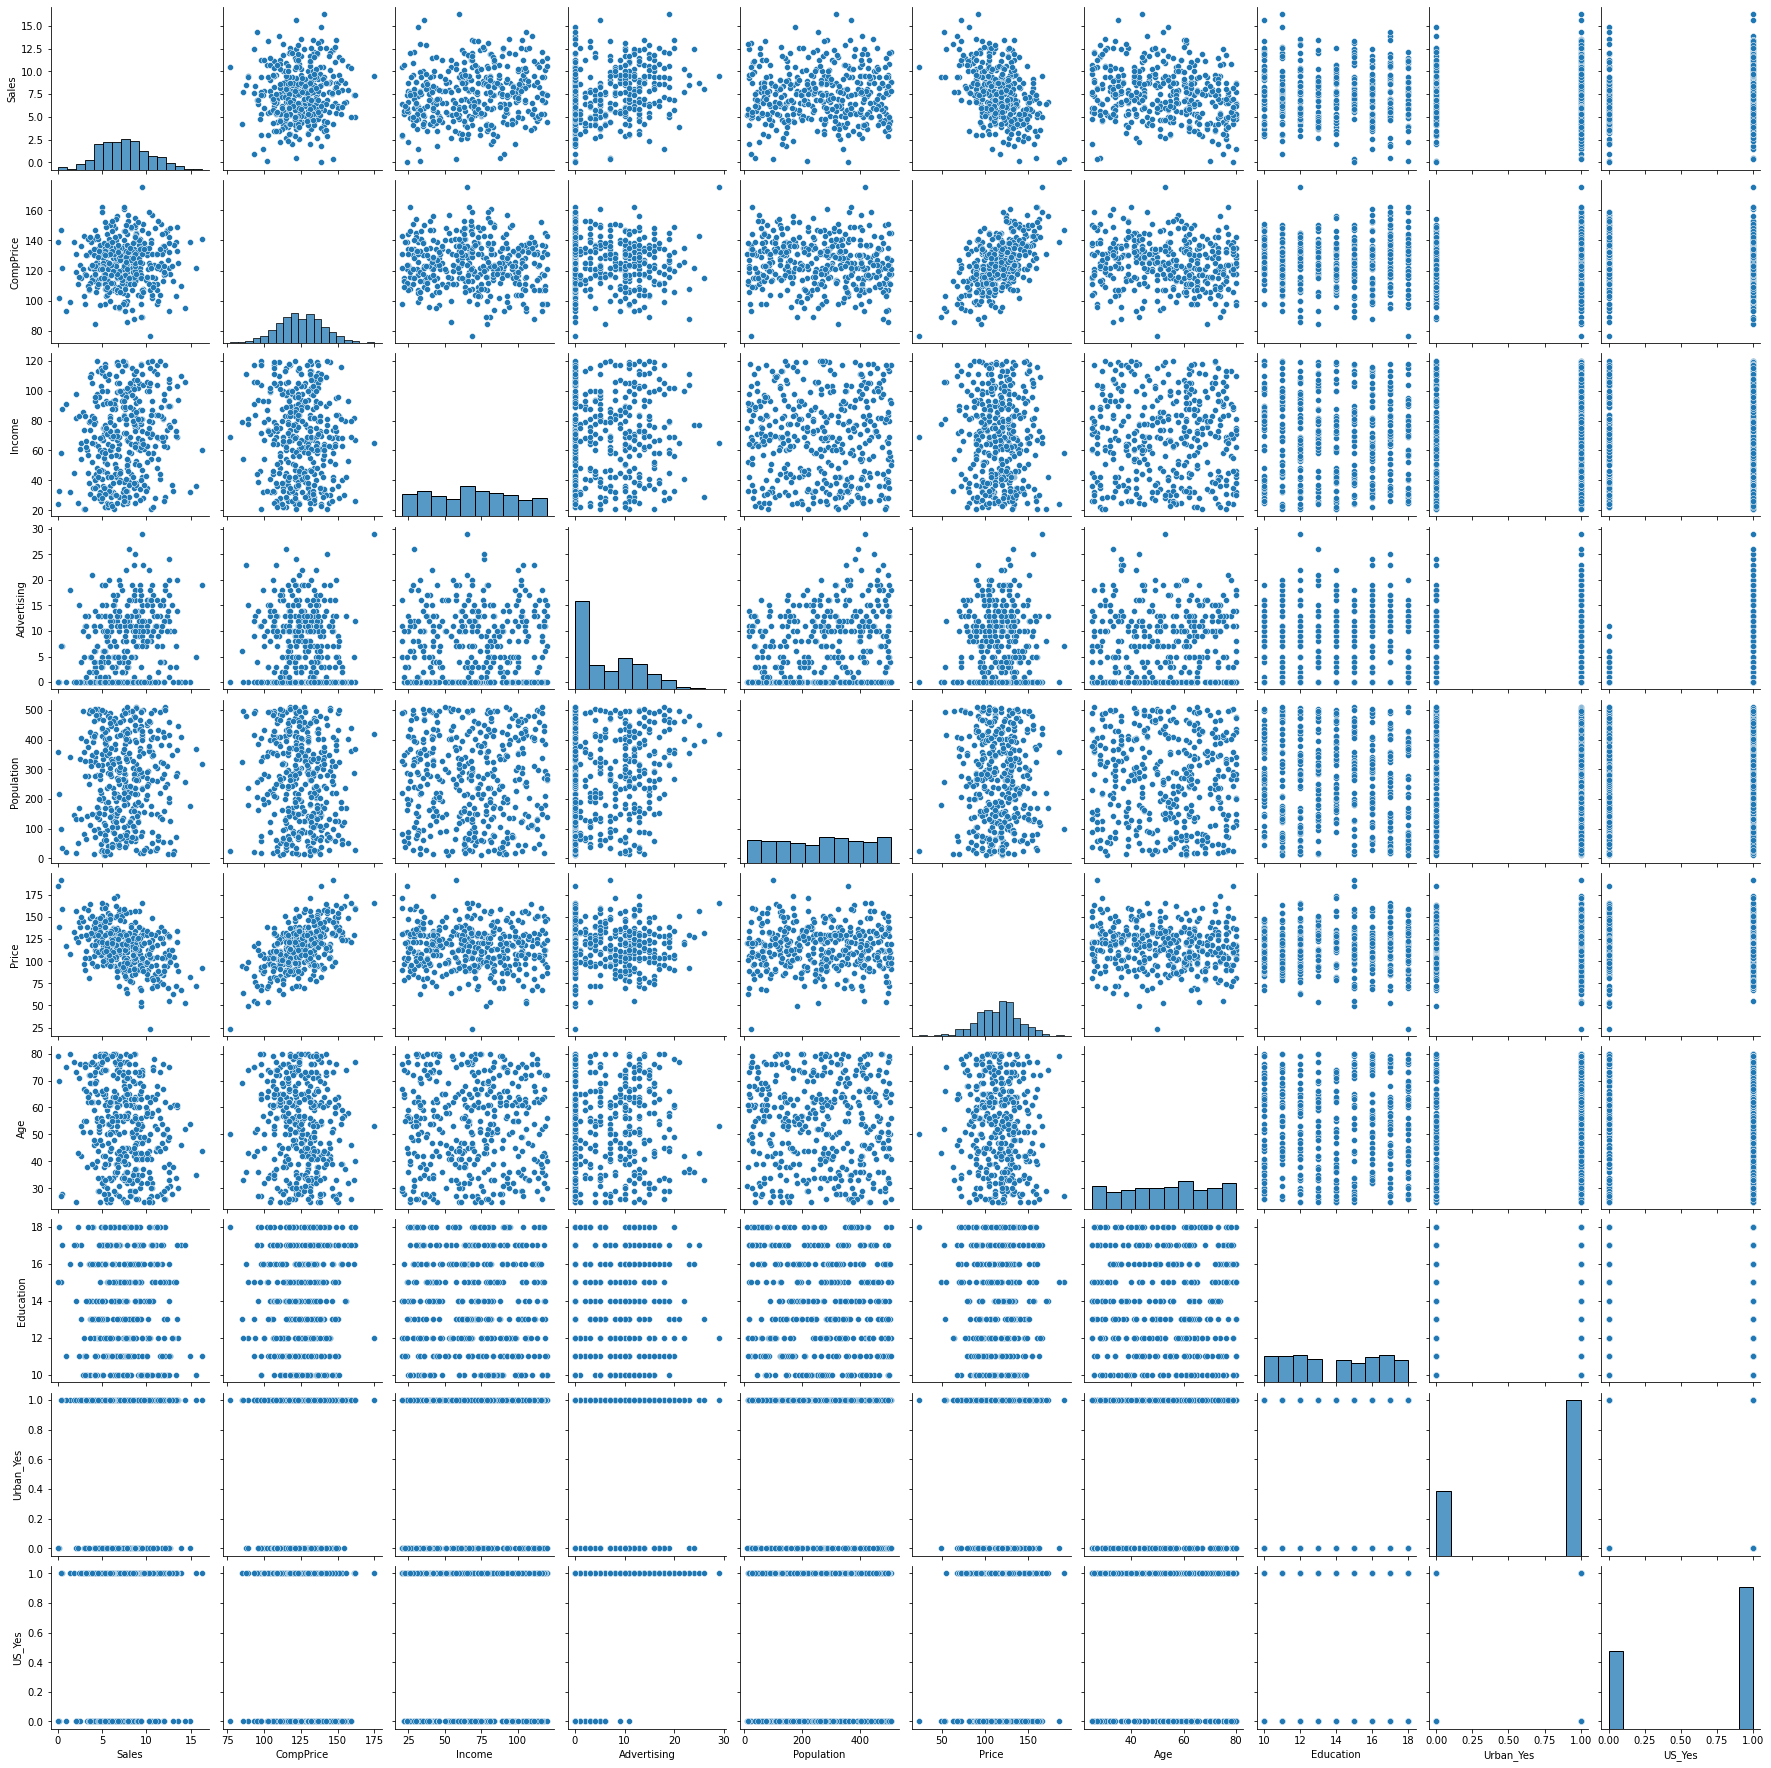

In [20]:
#Multivariate Analysis
sns.pairplot(dt, palette='coolwarm')
plt.show()

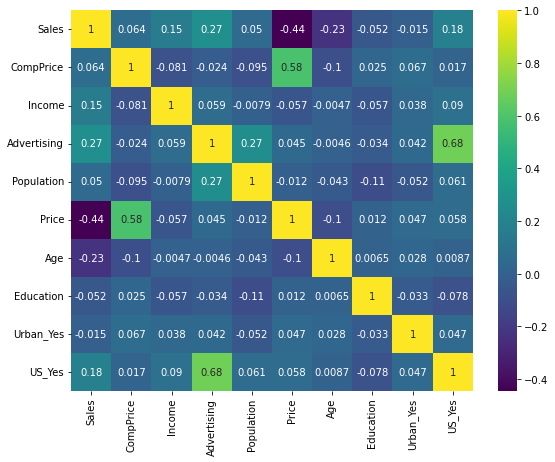

In [21]:
#correlation matrix
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(dt.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

Index(['ShelveLoc', 'Sales_cat'], dtype='object')


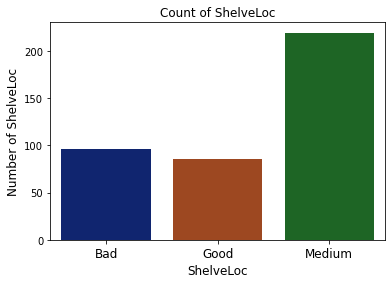

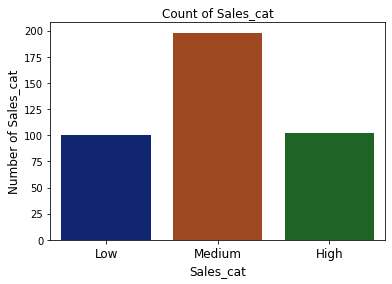

In [22]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(6,4))
    unique = dt1[column].value_counts(ascending=True);   
    plt.title("Count of "+ column)
    sns.countplot(data= dt1, x=column, palette = "dark")
    plt.xticks(rotation = 0, size = 12)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
plt.show()

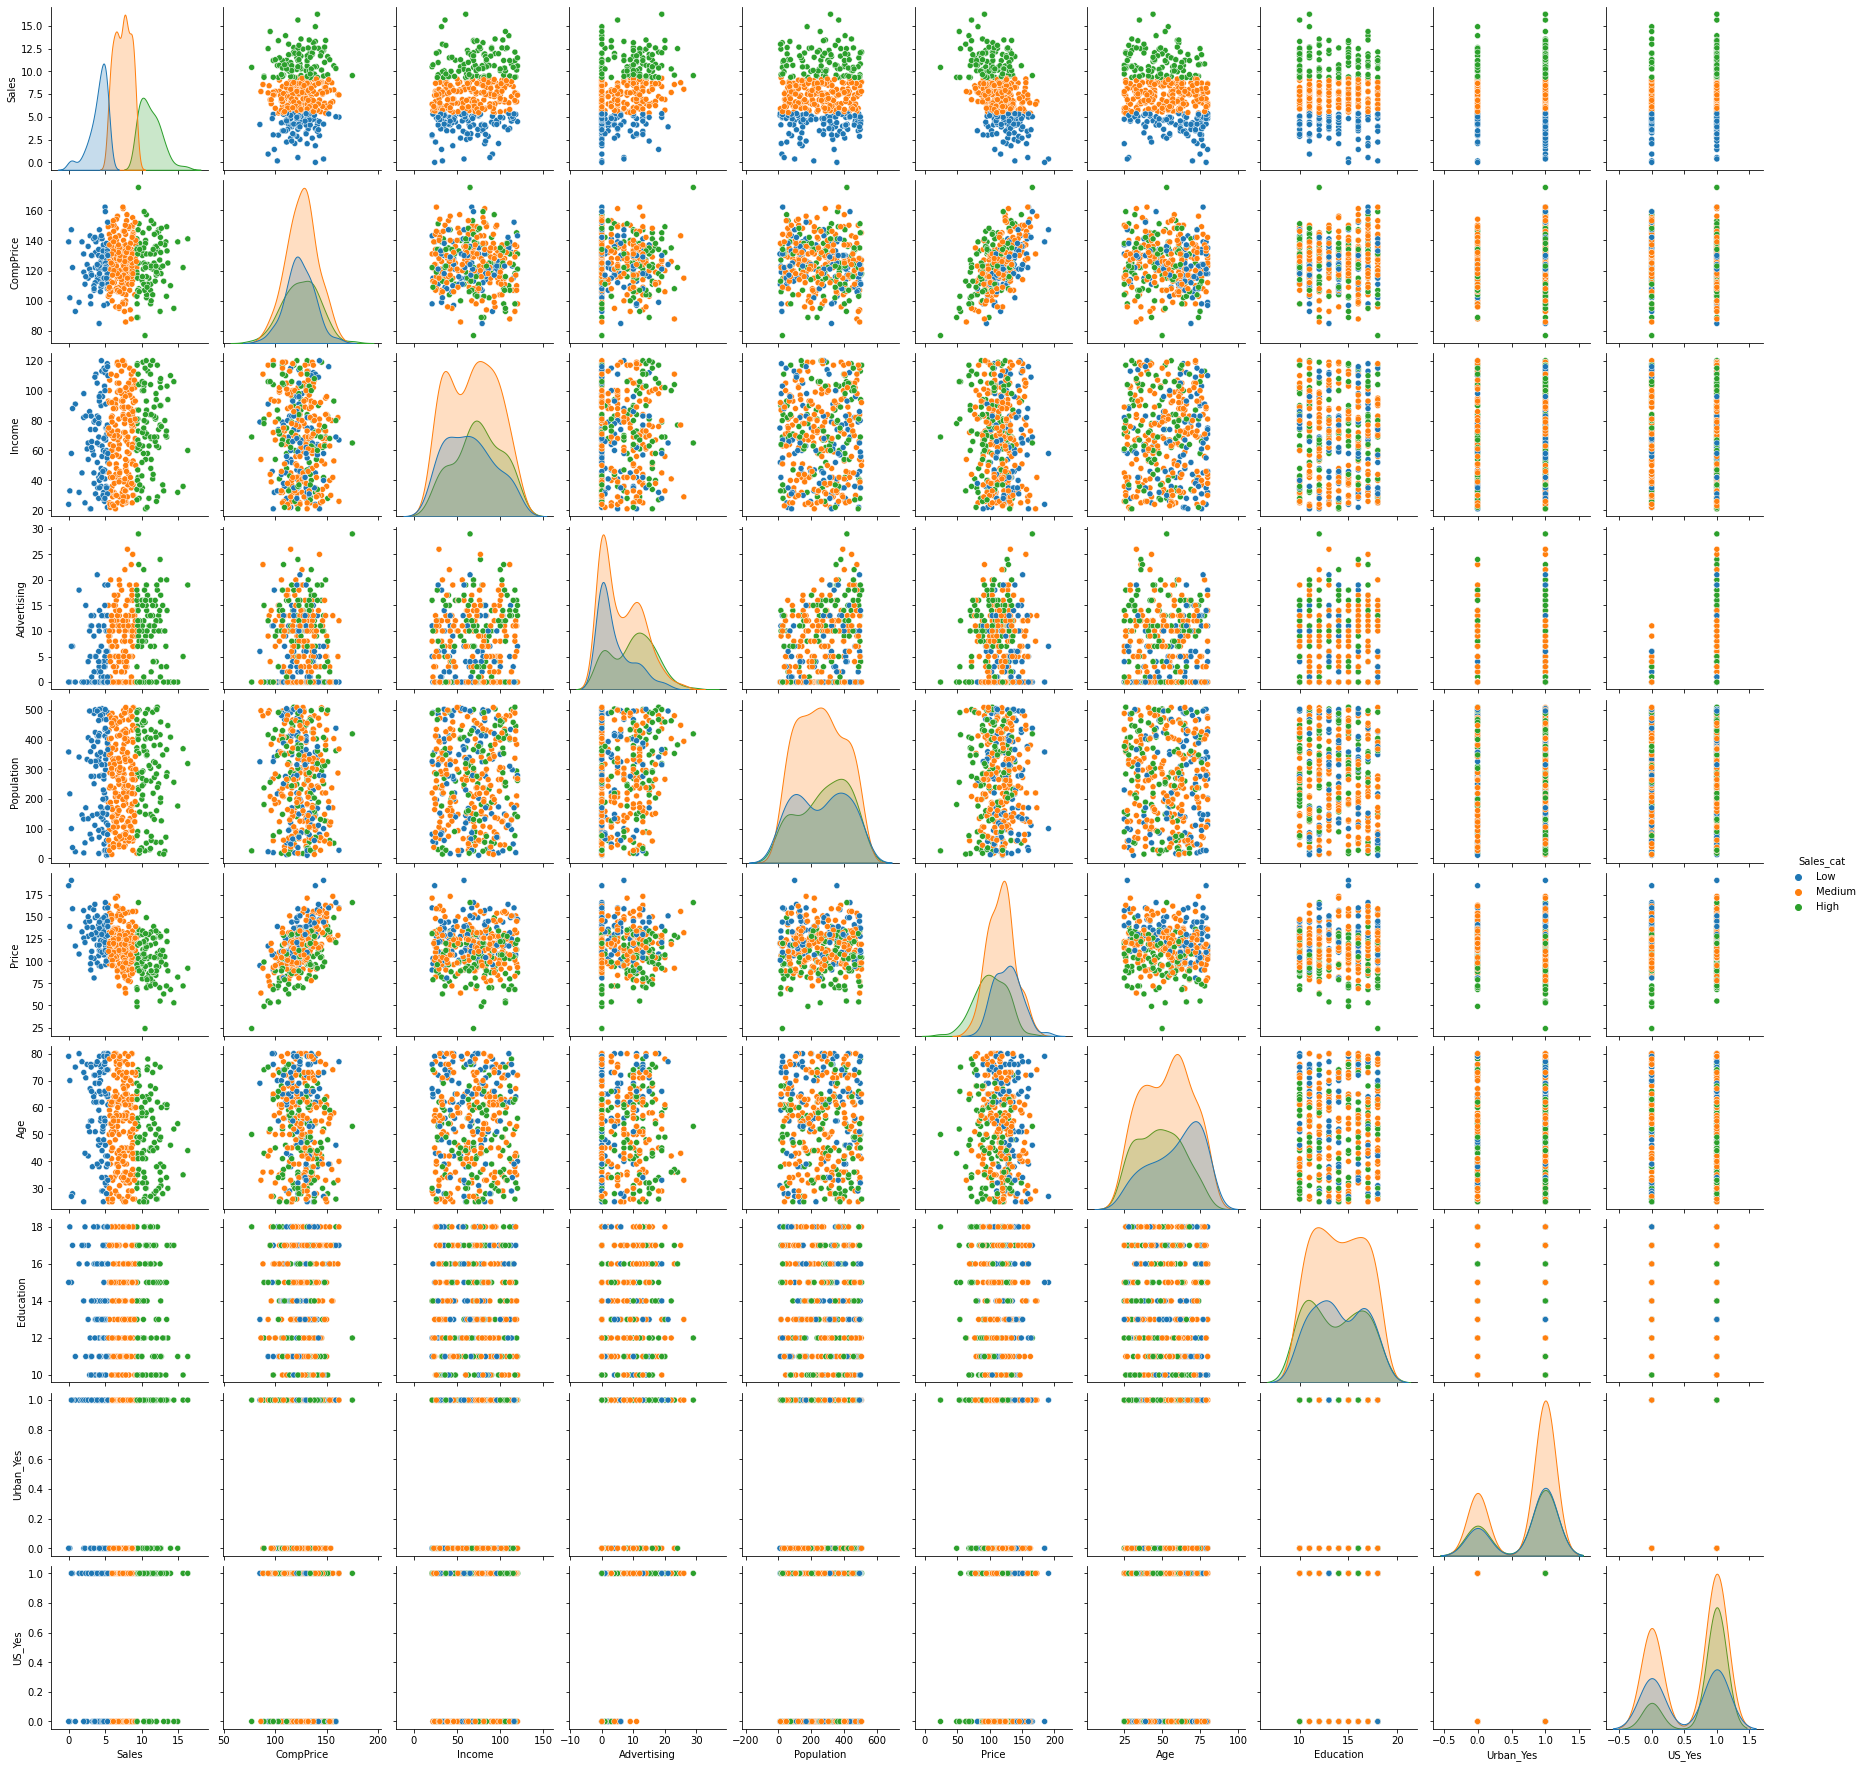

In [23]:
sns.pairplot(data= dt1, hue = 'Sales_cat')
plt.show()

In [24]:
dt_dummi = dt1.copy()
dt_dummi.drop('Sales',axis=1, inplace =True)
dt_dummi = pd.get_dummies(dt_dummi.iloc[:,:-1])
dt_dummi.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,1,1,1,0,0
1,111,48,16,260,83,65,10,1,1,0,1,0
2,113,35,10,269,80,59,12,1,1,0,0,1
3,117,100,4,466,97,55,14,1,1,0,0,1
4,141,64,3,340,128,38,13,1,0,1,0,0


In [25]:
dt2 = dt1.copy()
dt2.drop('Sales',axis=1, inplace =True)
dt2 = pd.get_dummies(dt2.iloc[:,:-1])
dt2.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,1,1,1,0,0
1,111,48,16,260,83,65,10,1,1,0,1,0
2,113,35,10,269,80,59,12,1,1,0,0,1
3,117,100,4,466,97,55,14,1,1,0,0,1
4,141,64,3,340,128,38,13,1,0,1,0,0


In [26]:
dt2['Sales'] = dt1.Sales_cat
dt2.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Sales
0,138,73,11,276,120,42,17,1,1,1,0,0,High
1,111,48,16,260,83,65,10,1,1,0,1,0,High
2,113,35,10,269,80,59,12,1,1,0,0,1,High
3,117,100,4,466,97,55,14,1,1,0,0,1,Medium
4,141,64,3,340,128,38,13,1,0,1,0,0,Low


In [27]:
le = LabelEncoder()
le.fit(dt2["Sales"])
dt2["Sales"]=le.transform(dt2["Sales"])
dt2.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Sales
0,138,73,11,276,120,42,17,1,1,1,0,0,0
1,111,48,16,260,83,65,10,1,1,0,1,0,0
2,113,35,10,269,80,59,12,1,1,0,0,1,0
3,117,100,4,466,97,55,14,1,1,0,0,1,2
4,141,64,3,340,128,38,13,1,0,1,0,0,1


In [28]:
x = dt2.iloc[:, :-1]
y=  dt2.Sales

In [29]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,1,1,1,0,0
1,111,48,16,260,83,65,10,1,1,0,1,0
2,113,35,10,269,80,59,12,1,1,0,0,1
3,117,100,4,466,97,55,14,1,1,0,0,1
4,141,64,3,340,128,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,0,1,0
396,139,23,3,37,120,55,11,0,1,0,0,1
397,162,26,12,368,159,40,18,1,1,0,0,1
398,100,79,7,284,95,50,12,1,1,1,0,0


In [30]:
y

0      0
1      0
2      0
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    0
Name: Sales, Length: 400, dtype: int32

In [31]:
dt2['Sales'].unique()

array([0, 2, 1])

In [32]:
colm_names= list(dt2.columns)
colm_names

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Sales']

In [33]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [34]:
x_train

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
85,125,103,0,304,112,49,13,0,0,0,0,1
69,127,59,0,339,99,65,12,1,0,0,0,1
203,131,82,0,132,157,25,14,1,0,1,0,0
379,125,111,0,404,107,54,15,1,0,1,0,0
261,121,42,4,188,118,54,15,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
306,131,32,1,85,133,48,12,1,1,0,0,1
165,147,58,7,100,191,27,15,1,1,1,0,0
7,136,81,15,425,120,67,10,1,1,0,1,0
219,116,79,19,359,116,58,17,1,1,0,1,0


In [35]:
x_test

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
132,125,87,9,232,136,72,10,1,1,0,1,0
390,108,75,9,61,111,67,12,1,1,0,0,1
310,175,65,29,419,166,53,12,1,1,0,0,1
3,117,100,4,466,97,55,14,1,1,0,0,1
248,111,52,0,12,101,61,11,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
361,131,25,10,183,104,56,15,0,1,0,0,1
197,124,61,0,333,138,76,16,1,0,0,0,1
23,121,31,0,292,109,79,10,1,0,0,0,1
54,134,103,13,25,144,76,17,0,1,0,0,1


In [36]:
y_train

85     2
69     2
203    1
379    2
261    2
      ..
306    1
165    1
7      0
219    0
326    1
Name: Sales, Length: 320, dtype: int32

In [37]:
y_test

132    0
390    2
310    0
3      2
248    1
      ..
361    2
197    1
23     2
54     1
58     2
Name: Sales, Length: 80, dtype: int32

# Building decision tre classifier using entropy criteria

In [51]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [52]:
from sklearn import tree

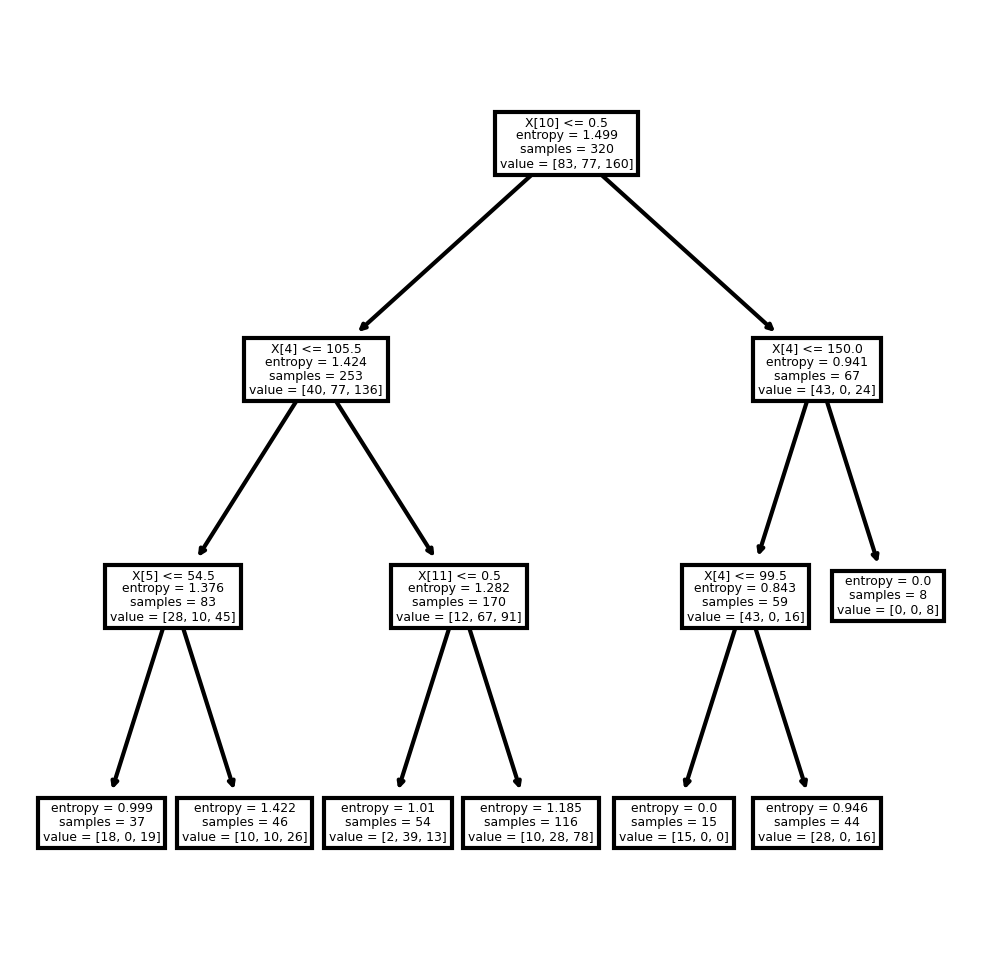

In [53]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model);

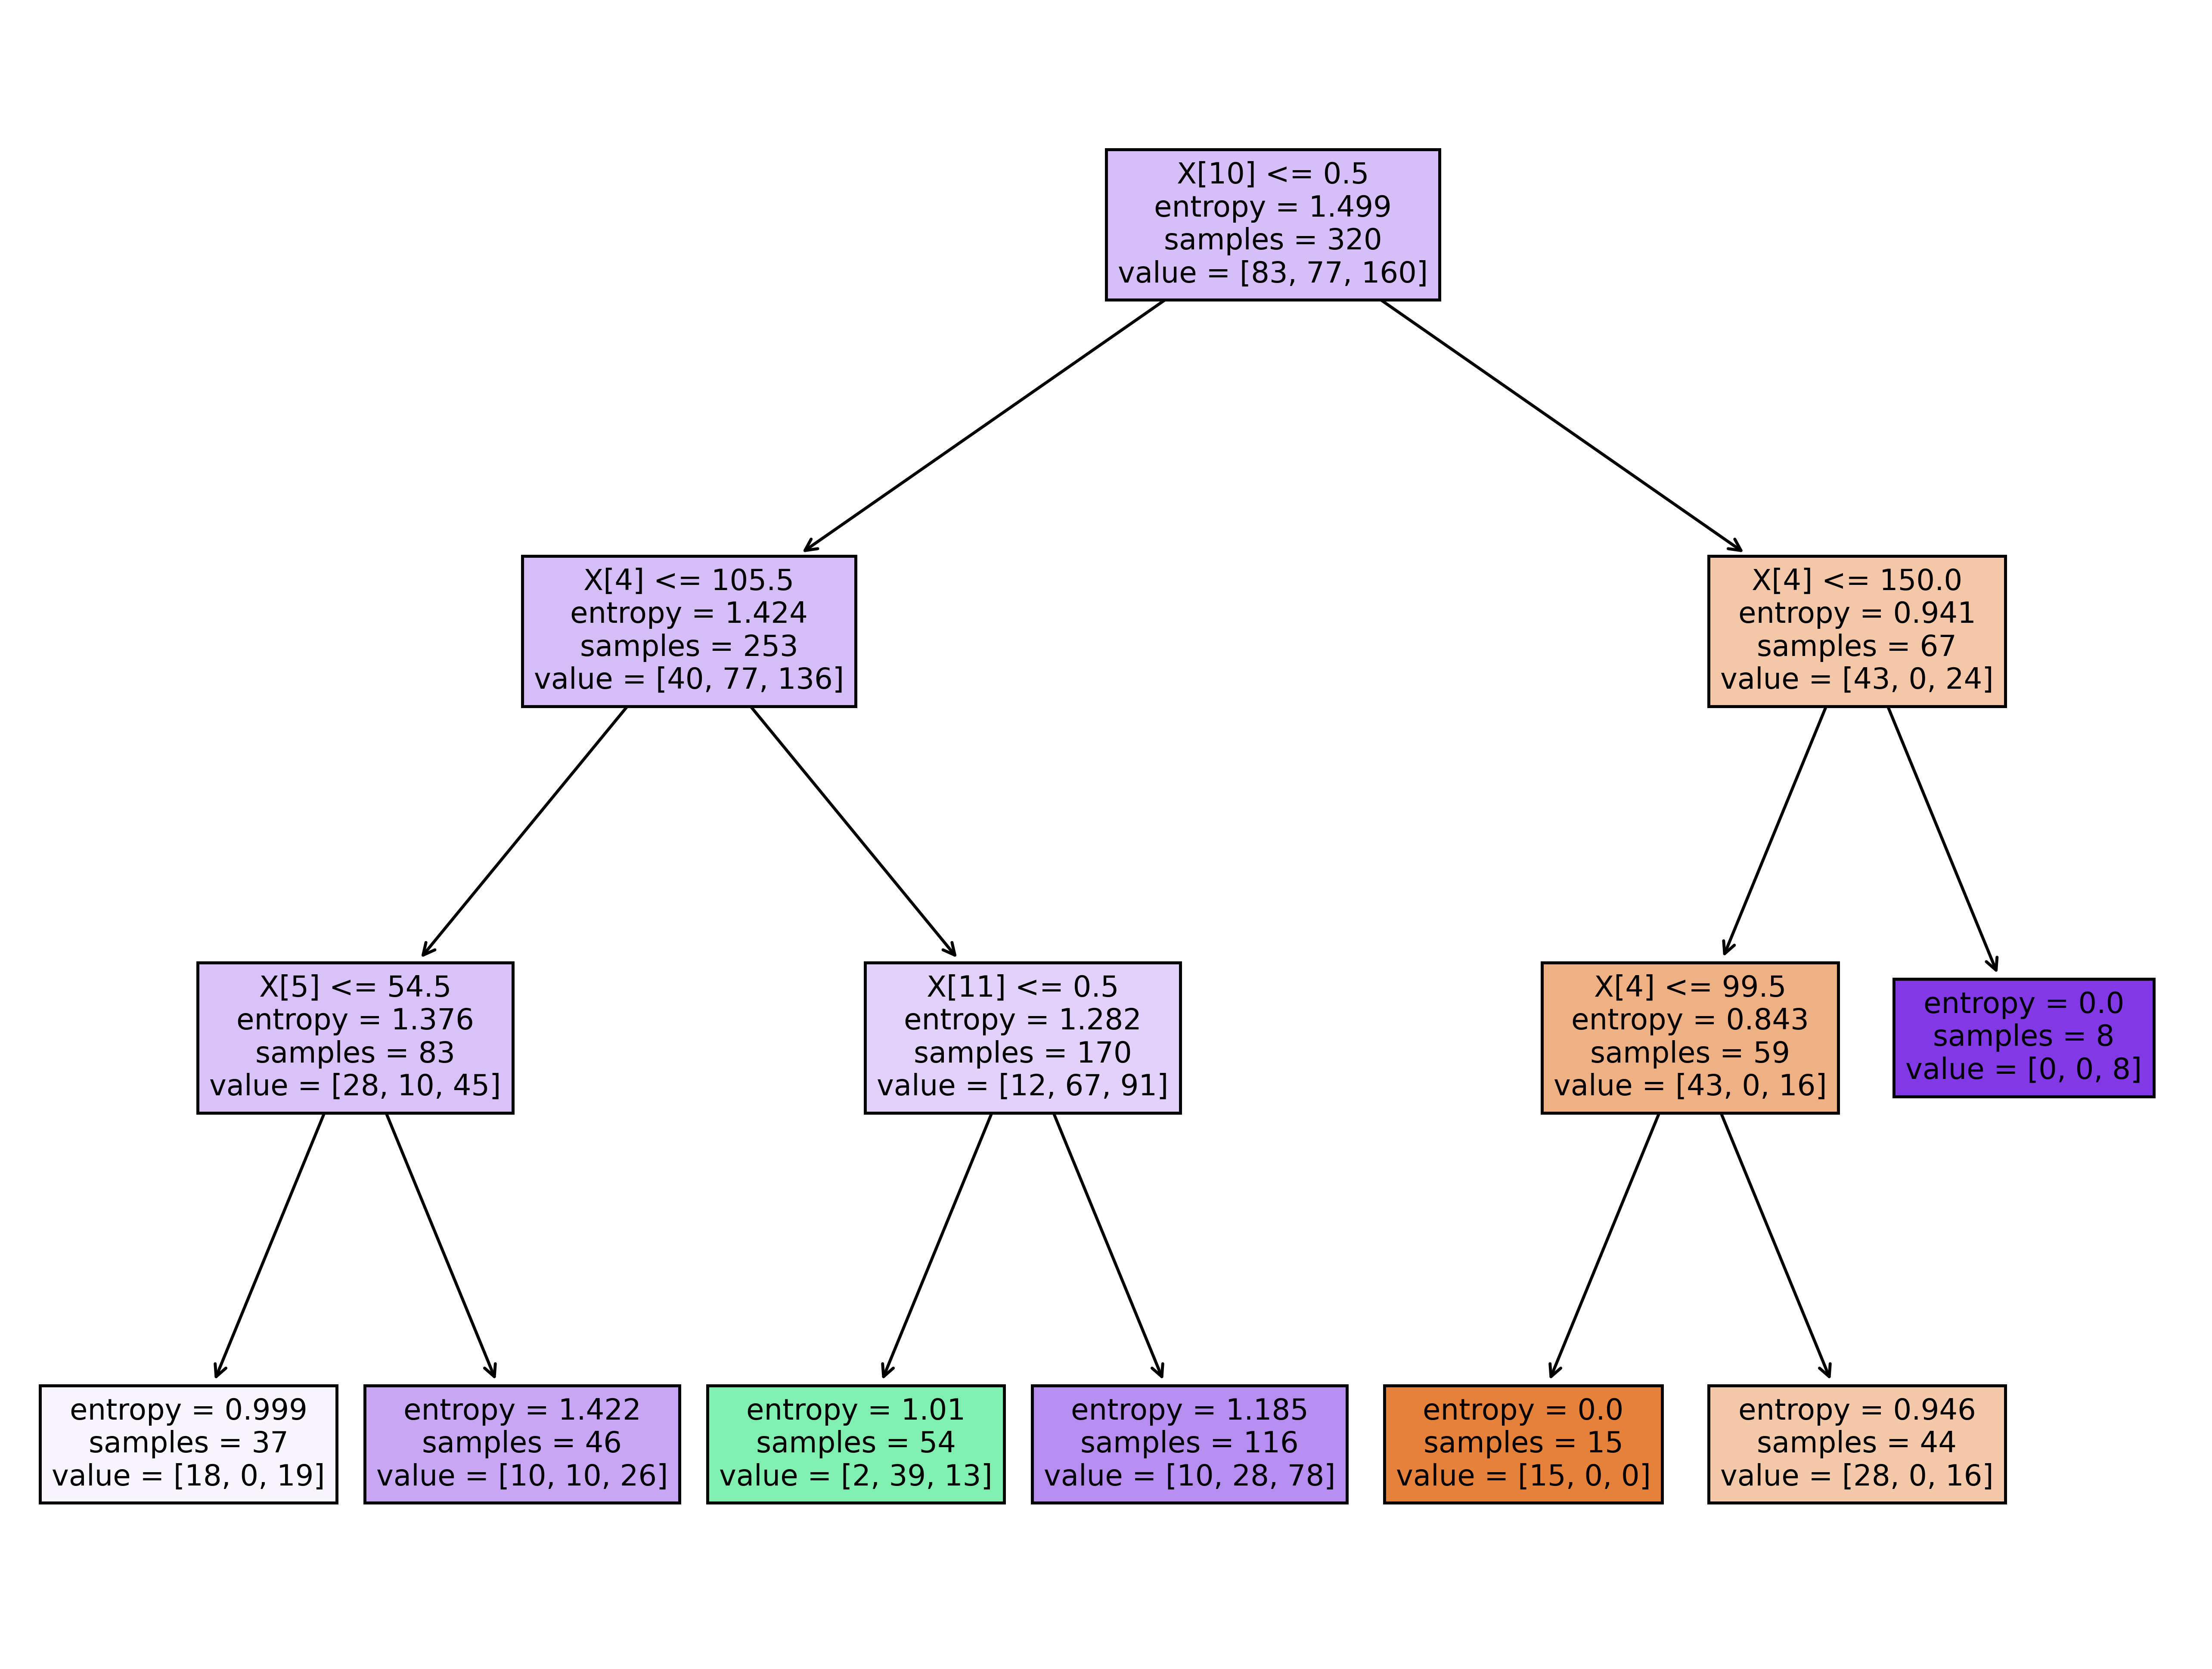

In [65]:
plt.figure(figsize=(13,10),dpi=500)
tree.plot_tree(model,filled=True)
plt.show()

In [66]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

2    56
0    17
1     7
dtype: int64

In [67]:
preds

array([0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0,
       0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [68]:
pd.crosstab(y_test,preds) 

col_0,0,1,2
Sales,,,
0,10,0,9
1,1,4,18
2,6,3,29


In [69]:
np.mean(preds==y_test)

0.5375

In [71]:
#Building Decision Tree Classifier (CART) using Gini Criteria
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [72]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [73]:
preds=model_gini.predict(x_test)
np.mean(preds==y_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.56      0.79      0.65        19
           1       0.50      0.17      0.26        23
           2       0.49      0.58      0.53        38

    accuracy                           0.51        80
   macro avg       0.51      0.51      0.48        80
weighted avg       0.51      0.51      0.48        80



In [74]:
#Running the decision tree classifier on whole data

In [75]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_gini.fit(x, y)
#Prediction and computing the accuracy
preds=model_gini.predict(x)
np.mean(preds==y)

0.6575

In [76]:
pd.crosstab(y,preds)

col_0,0,1,2
Sales,,,
0,59,2,41
1,0,43,57
2,21,16,161
